<a href="https://colab.research.google.com/github/AhmadAlabrash/Ro-Deep-Learning/blob/main/RO_DL_time%26SGD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [71]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [72]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [73]:
%%timeit -n1 -r1
with tf.device('/CPU:0'):
  print('as')

as
2.87 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [74]:
(X,Y) ,(x,y) =tf.keras.datasets.cifar10.load_data()


In [75]:
X[1]

array([[[154, 177, 187],
        [126, 137, 136],
        [105, 104,  95],
        ...,
        [ 91,  95,  71],
        [ 87,  90,  71],
        [ 79,  81,  70]],

       [[140, 160, 169],
        [145, 153, 154],
        [125, 125, 118],
        ...,
        [ 96,  99,  78],
        [ 77,  80,  62],
        [ 71,  73,  61]],

       [[140, 155, 164],
        [139, 146, 149],
        [115, 115, 112],
        ...,
        [ 79,  82,  64],
        [ 68,  70,  55],
        [ 67,  69,  55]],

       ...,

       [[175, 167, 166],
        [156, 154, 160],
        [154, 160, 170],
        ...,
        [ 42,  34,  36],
        [ 61,  53,  57],
        [ 93,  83,  91]],

       [[165, 154, 128],
        [156, 152, 130],
        [159, 161, 142],
        ...,
        [103,  93,  96],
        [123, 114, 120],
        [131, 121, 131]],

       [[163, 148, 120],
        [158, 148, 122],
        [163, 156, 133],
        ...,
        [143, 133, 139],
        [143, 134, 142],
        [143, 133, 144]]

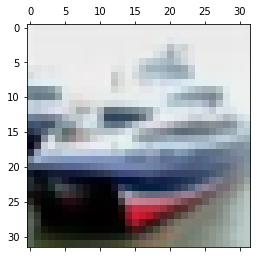

In [76]:
plt.matshow(x[1])

In [77]:
X.shape

(50000, 32, 32, 3)

In [78]:
y[1]

array([8], dtype=uint8)

In [79]:
x_scaled = X/255
x_scaled.shape

(50000, 32, 32, 3)

In [80]:
x_test_scaled = x/255

In [81]:
y_ctegorical = keras.utils.to_categorical(Y,num_classes=10)
y_test_cate =keras.utils.to_categorical(y,num_classes=10)

In [82]:
from tensorflow._api.v2.config import optimizer
model = tf.keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(1000,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid'),
])
model.compile(

  optimizer='SGD',
  loss='categorical_crossentropy',
  metrics  = ['accuracy']
)
model.fit(x_scaled,y_ctegorical,epochs=50)

Epoch 1/50
1563/1563 [==============================] - 31s 19ms/step - loss: 1.8478 - accuracy: 0.3427
Epoch 2/50
1563/1563 [==============================] - 32s 21ms/step - loss: 1.6734 - accuracy: 0.4109
Epoch 3/50
1563/1563 [==============================] - 31s 20ms/step - loss: 1.5974 - accuracy: 0.4411
Epoch 4/50
1563/1563 [==============================] - 30s 19ms/step - loss: 1.5458 - accuracy: 0.4578
Epoch 5/50
1563/1563 [==============================] - 32s 20ms/step - loss: 1.5016 - accuracy: 0.4745
Epoch 6/50
1563/1563 [==============================] - 33s 21ms/step - loss: 1.4669 - accuracy: 0.4873
Epoch 7/50
1563/1563 [==============================] - 33s 21ms/step - loss: 1.4341 - accuracy: 0.4990
Epoch 8/50
1563/1563 [==============================] - 31s 20ms/step - loss: 1.4058 - accuracy: 0.5085
Epoch 9/50
1563/1563 [==============================] - 32s 21ms/step - loss: 1.3795 - accuracy: 0.5192
Epoch 10/50
1563/1563 [==============================] - 31s 20m

In [83]:
model.evaluate(x_test_scaled,y_test_cate)

313/313 [==============================] - 4s 11ms/step - loss: 1.4622 - accuracy: 0.5165


[1.4621661901474, 0.5164999961853027]

In [84]:
np.argmax(model.predict(x_test_scaled)[9])

313/313 [==============================] - 3s 9ms/step


1

In [85]:
y[9]

array([1], dtype=uint8)